In [2]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("000_VTA_PRM1_C19.mzML", exp)
spectra = exp.getSpectra()
observed_spectrum = spectra[4]

In [3]:
from pyopenms import *
dig = ProteaseDigestion()
dig.getEnzymeName() 


entries = []
f = FASTAFile()
f.load("Theo.fasta", entries)
bsa2=[]
for e in entries:
    bsa2.append(AASequence.fromString( e.sequence))    
resultAll = []
resultOneSeq=[]
result=[]
for u in bsa2:
    resultOneSeq.append( dig.digest(u, result))
    for re in result:
        print(re)
        resultAll.append(re)
    print (100*"=")

MAALDSLSLFTSLGLSEQK
AR
ETLK
NSALSAQLR
EAATQAQQTLGSTIDK
ATGILLYGLASR
LR
DTR
R
LSFLVSYIASK
K
IHTEPQLSAALEYVR
SHPLDPIDTVDFER
ECGVGVIVTPEQIEEAVEAAINR
HRPQLLVER
YHFNMGLLMGEAR
AVLK
WADGK
MIK
NEVDMQVLHLLGPK
LEADLEK
K
FK
VAK
AR
LEETDR
R
TAK
DVVENGETADQTLSLMEQLR
GEALK
FHKPGENYK
TPGYVVTPHTMNLLK
QHLEITGGQVR
TR
FPPEPNGILHIGHAK
AINFNFGYAK
ANNGICFLR
FDDTNPEK
EEAK
FFTAICDMVAWLGYTPYK
VTYASDYFDQLYAWAVELIR
R
GLAYVCHQR
GEELK
GHNTLPSPWR
DRPMEESLLLFEAMR
K
GK
FSEGEATLR
MK
LVMEDGK
MDPVAYR
VK
YTPHHR
TGDK
WCIYPTYDYTHCLCDSIEHITHSLCTK
EFQAR
R
SSYFWLCNALDVYCPVQWEYGR
LNLHYAVVSK
R
K
ILQLVATGAVR
DWDDPR
LFTLTALR
R
R
GFPPEAINNFCAR
VGVTVAQTTMEPHLLEACVR
DVLNDTAPR
AMAVLESLR
VIITNFPAAK
SLDIQVPNFPADETK
GFHQVPFAPIVFIER
TDFK
EEPEPGFK
R
LAWGQPVGLR
HTGYVIELQHVVK
GPSGCVESLEVTCR
R
ADAGEKPK
AFIHWVSQPLMCEVR
LYER
LFQHK
NPEDPTEVPGGFLSDLNLASLHVVDAALVDCSVALAKPFDK
FQFER
LGYFSVDPDSHQGK
LVFNR
TVTLK
EDPGK
V
MGAR
GALLLALLLAR
AGLR
KPESQEAAPLSGPCGR
R
VITSR
IVGGEDAELGR
WPWQGSLR
LWDSHVCGVSLLSHR
WALTAAHCFETYSDLSDPSGWMVQFGQLTSMPSFWSLQAYYTR
YFVSN

In [4]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
entries =[]
f = FASTAFile()
f.load(r"resultAll.fasta", entries)
fasta_file=entries[0]
peptide = AASequence.fromString(fasta_file.sequence)
tsg.getSpectrum(theo_spectrum, peptide, 1, 2)
for ion, peak in zip(theo_spectrum.getStringDataArrays()[0], theo_spectrum):
    print(ion, peak.getMZ())

b'y1++' 59.546766142221
b'y2++' 88.05749819007102
b'b2++' 102.04607605507098
b'y3++' 116.568230237921
b'y1+' 118.086255817671
b'b3++' 137.56463313482098
b'y2+' 175.107719913371
b'b4++' 194.10666531027098
b'y4++' 194.61878592932104
b'b2+' 203.08487564337096
b'y3+' 232.12918400907097
b'y5++' 251.16081810477104
b'b5++' 251.62013739002097
b'b3+' 274.121989802871
b'b6++' 295.136151969771
b'y6++' 329.211373796171
b'b7++' 351.678184145221
b'y7++' 385.753405971621
b'b4+' 387.206054153771
b'y4+' 388.23029539187104
b'b8++' 395.194198724971
b'y8++' 435.28761311517104
b'b9++' 451.736230900421
b'y9++' 491.82964529062104
b'y5+' 501.31435974277105
b'b5+' 502.23299831327097
b'b10++' 525.270438043971
b'y10++' 560.359101402271
b'b11++' 575.794277655621
b'b6+' 589.265027472771
b'y11++' 616.901133577721
b'b12++' 619.3102922353711
b'y6+' 657.415471125571
b'y12++' 667.424973189371
b'b13++' 675.8523244108211
b'b7+' 702.349091823671
b'b14++' 704.363056458671
b'y13++' 710.9409877691211
b'b15++' 760.90508863412

346.51775164056556
1616.1621479241408


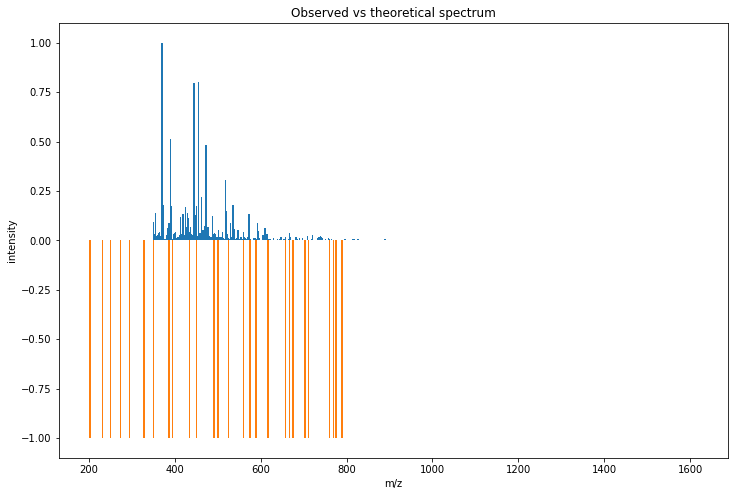

In [6]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int]
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()


print(min(obs_mz))
print(max(obs_mz)) 

theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [7]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

In [10]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")
for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))

Number of matched peaks: 20
ion	theo. m/z	observed m/z
b7++	2	351.678184145221	351.678372684875
y7++	2	385.753405971621	385.79908804540554
b4+	1	387.206054153771	387.2055277787431
y4+	1	388.23029539187104	388.2309235306787
b8++	2	395.194198724971	395.184898724151
y8++	2	435.28761311517104	435.34520202133683
b9++	2	451.736230900421	451.7161914887091
y9++	2	491.82964529062104	491.8295126352524
y5+	1	501.31435974277105	501.28898378810305
b5+	1	502.23299831327097	501.94869051486586
b10++	2	525.270438043971	525.2799598068392
y10++	2	560.359101402271	560.8410040240839
b6+	1	589.265027472771	588.8723983374019
y11++	2	616.901133577721	616.9025175637059
b12++	2	619.3102922353711	619.7410662560254
y6+	1	657.415471125571	657.7652897288622
y12++	2	667.424973189371	667.2208366959128
b7+	1	702.349091823671	702.7616866498944
b14++	2	704.363056458671	704.821393840089
b18++	2	932.9716894531211	932.7006071662397


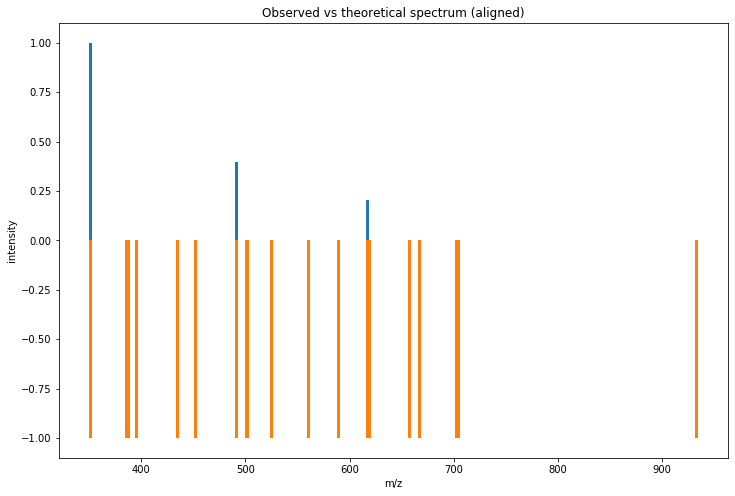

In [9]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)